In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Brent Oil Prices data
brent_oil_prices =  pd.read_csv('../data/BrentOilPrices.csv')
# Convert the 'Date' column to datetime, handling inconsistencies
brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)
brent_oil_prices['Year'] = brent_oil_prices['Date'].dt.year
# Load the population data
population_data = pd.read_csv('../data/population_total_long.csv')

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_9272\2354475765.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)
C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_9272\2354475765.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)


In [4]:
brent_oil_prices 

,Date,Price,Year
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987
...,...,...,...
9006,2022-11-08,96.85,2022
9007,2022-11-09,93.05,2022
9008,2022-11-10,94.25,2022
9009,2022-11-11,96.37,2022


In [5]:
population_data

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411
...,...,...,...
12590,Kosovo,2017,1830700
12591,"Yemen, Rep.",2017,27834821
12592,South Africa,2017,57000451
12593,Zambia,2017,16853688


In [6]:
# Merge both DataFrames on the date
merged_data = pd.merge(brent_oil_prices, population_data, left_on='Year', right_on='Year', how='inner')

# Drop the redundant 'Year' column after merge
merged_data.drop(columns=['Year'], inplace=True)

# Save the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)

print("Merging completed and saved to 'merged_data.csv'")

Merging completed and saved to 'merged_data.csv'


In [7]:
merged_data.info()
merged_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695750 entries, 0 to 1695749
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Price         float64       
 2   Country Name  object        
 3   Count         int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 51.8+ MB


,Date,Price,Country Name,Count
0,1987-05-20,18.63,Aruba,61833
1,1987-05-20,18.63,Afghanistan,11604534
2,1987-05-20,18.63,Angola,10689250
3,1987-05-20,18.63,Albania,3083605
4,1987-05-20,18.63,Andorra,48455
...,...,...,...,...
1695745,2017-12-29,66.73,Kosovo,1830700
1695746,2017-12-29,66.73,"Yemen, Rep.",27834821
1695747,2017-12-29,66.73,South Africa,57000451
1695748,2017-12-29,66.73,Zambia,16853688


Date            0
Price           0
Country Name    0
Count           0
dtype: int64


C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_9272\1574847664.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Price'].fillna(method='ffill', inplace=True)
C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_9272\1574847664.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Price'].fillna(method='ffill', inplace=True)


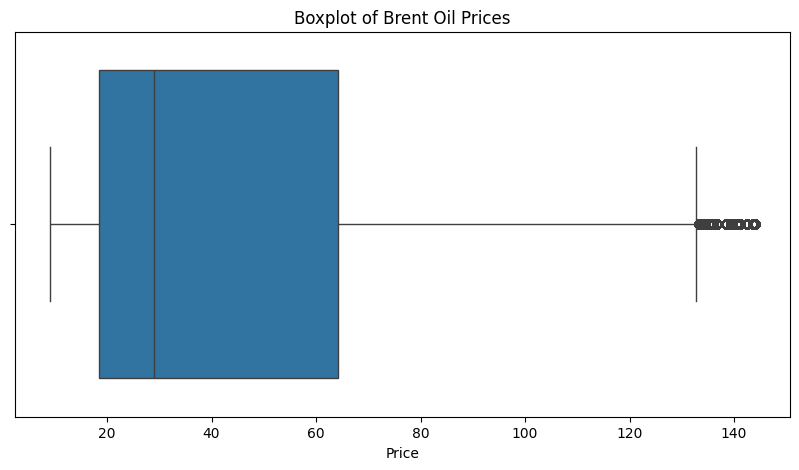

In [8]:
# Check for missing values
print(merged_data.isnull().sum())

# Fill missing values through forward fill
merged_data['Price'].fillna(method='ffill', inplace=True)

# Check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_data['Price'])
plt.title('Boxplot of Brent Oil Prices')
plt.show()

In [9]:
# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

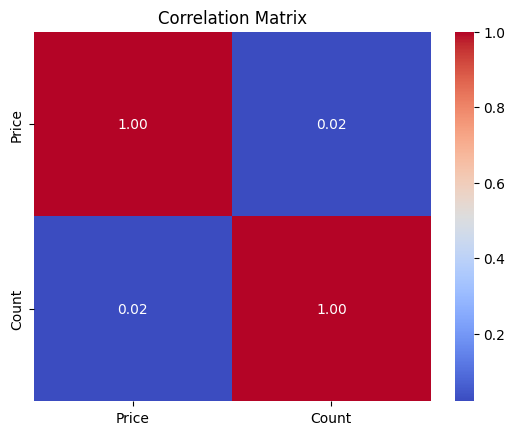

In [10]:
# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()